## Data Exploration & Analysis

In [29]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [30]:
import seaborn as sns

import statsmodels as sm

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm

In [32]:
df = pd.read_csv('Record_of_the_Year.csv', index_col=0)

In [33]:
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.982,0.547,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.760,0.549,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.631,0.466,0.3890,0.843000,0.295,-12.825,0.0253,92.631,4,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.966,0.235,0.2640,0.074700,0.128,-12.817,0.0312,91.656,3,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.955,0.313,0.0780,0.000004,0.169,-17.583,0.0332,128.065,4,1


In [34]:
df = df.drop('danceability.1', axis = 1)

In [35]:
df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.982,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.760,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.631,0.3890,0.843000,0.295,-12.825,0.0253,92.631,4,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.966,0.2640,0.074700,0.128,-12.817,0.0312,91.656,3,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.955,0.0780,0.000004,0.169,-17.583,0.0332,128.065,4,1


In [36]:
df.shape

(8439, 16)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 0 to 598
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8437 non-null   object 
 1   album               8437 non-null   object 
 2   artist              8437 non-null   object 
 3   release_date        8439 non-null   object 
 4   length              8439 non-null   int64  
 5   popularity          8439 non-null   int64  
 6   danceability        8439 non-null   float64
 7   acousticness        8439 non-null   float64
 8   energy              8439 non-null   float64
 9   instrumentalness    8439 non-null   float64
 10  liveness            8439 non-null   float64
 11  loudness            8439 non-null   float64
 12  speechiness         8439 non-null   float64
 13  tempo               8439 non-null   float64
 14  time_signature      8439 non-null   int64  
 15  record_of_the_year  8439 non-null   int64  
dtypes: floa

While name, album and artist have missing data for 2 rows, those columns will not be utilized for modeling, so we can ingnore them for now.

## Data Exploration

<b>Trend Exploration</b>

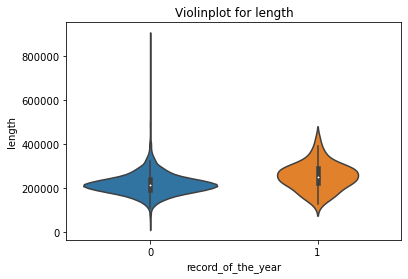

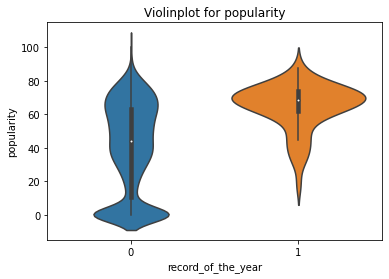

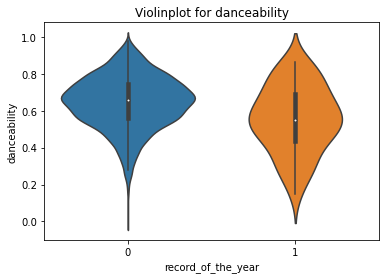

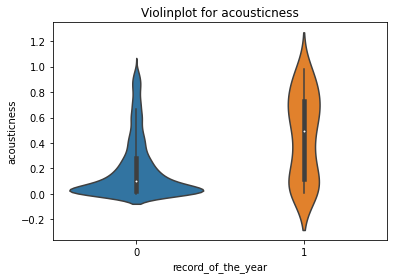

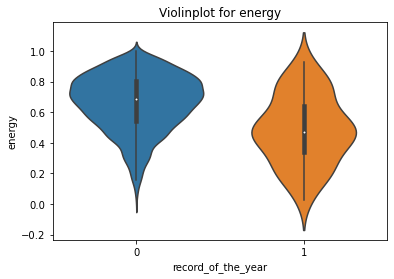

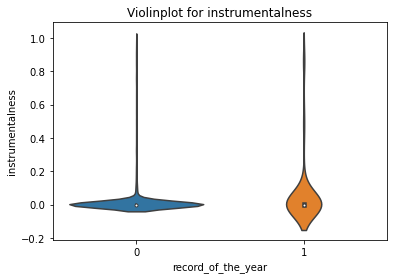

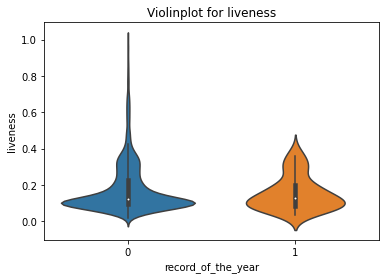

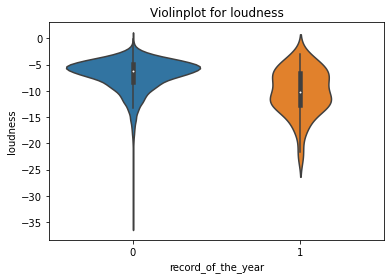

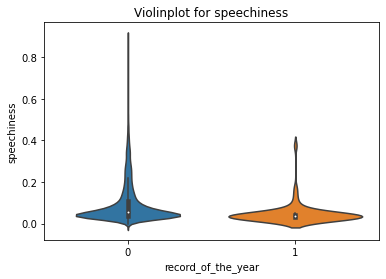

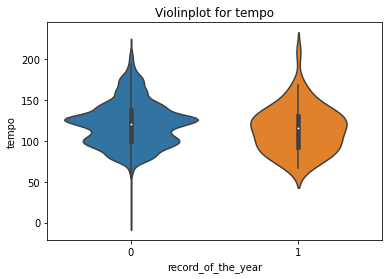

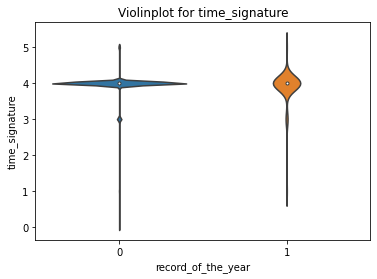

In [38]:
columns = ['length', 'popularity',
              'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 
           'tempo', 'time_signature']

for col in columns:

    sns.violinplot(y=col, x='record_of_the_year', data=df)
    plt.title(f'Violinplot for {col}')
    plt.show()

Taking a look at the data, we see the following for each of the song components: <br>


<b>Length</b>: Winners and Losers seem to have about the same average and similar skews. With that being said, Losers seem to have more songs that are longer <br>

<b>Popularity</b>: Winners tend to be more popular on average with a higher concentration of tracks being popular <br>

<b>Danceability</b>: Winners seem to have less "danceability" on average<br>

<b>Acousticness</b>: Winners seem to have higher acousticness on average with a more even skew. Losers, on average, are less accoustic and seem to skew towards smaller acoustic levels <br>

<b>Energy</b>: On average, Winners have lower engergy with a more normal distribution <br>

<b>Instrumentalness</b>: Instrumentalness seems about the same on average for Winners and Losers, with similar distributions <br>

<b>Liveness</b>: Liveness also seems about the same on average for Winners and Losers, with similar distributions <br>

<b>Loudness</b>: Winners on average have lower loudness scores and more normal distribution compared to Losers <br>

<b>Speechiness</b>: Speechiness seems about the same on average for Winners and Losers, with similar distributions <br>

<b>Tempo</b>: Tempo seems about the same on average for Winners and Losers, with similar distributions <br>

<b>Time Signature</b>: Time Signature seems about the same on average for Winners and Losers, with similar distributions <br>





<b> Checking distribution of all the columns </b>

COLUMN: length
n nulls: 0


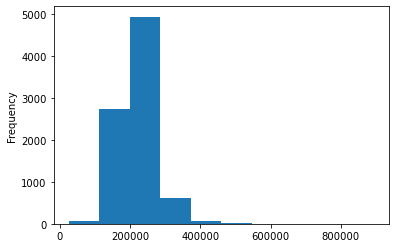



COLUMN: popularity
n nulls: 0


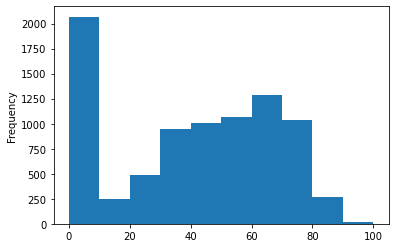



COLUMN: danceability
n nulls: 0


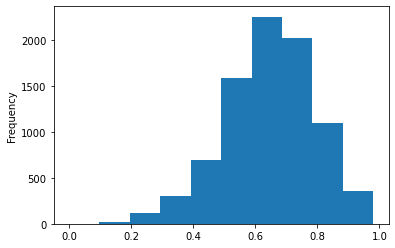



COLUMN: acousticness
n nulls: 0


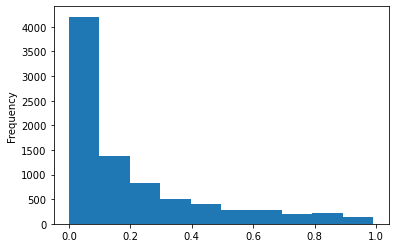



COLUMN: energy
n nulls: 0


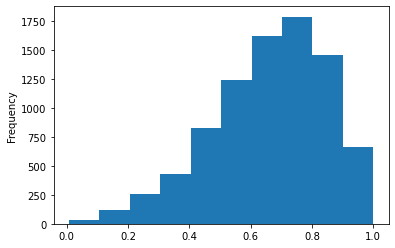



COLUMN: instrumentalness
n nulls: 0


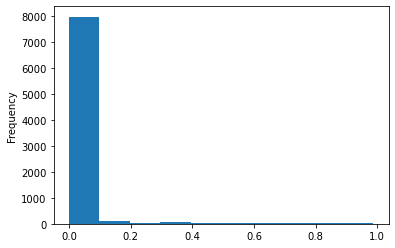



COLUMN: liveness
n nulls: 0


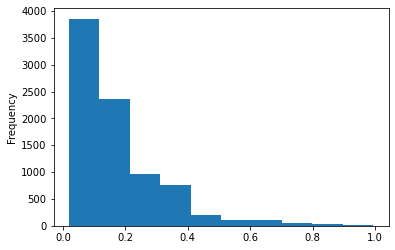



COLUMN: loudness
n nulls: 0


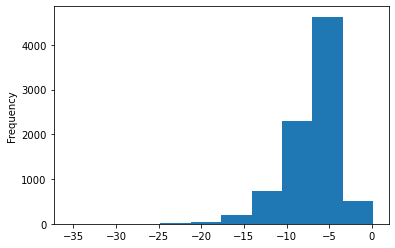



COLUMN: speechiness
n nulls: 0


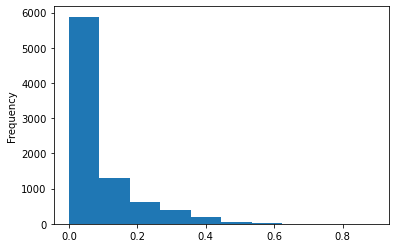



COLUMN: tempo
n nulls: 0


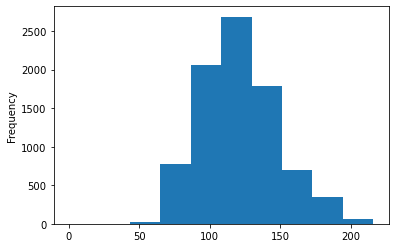



COLUMN: time_signature
n nulls: 0


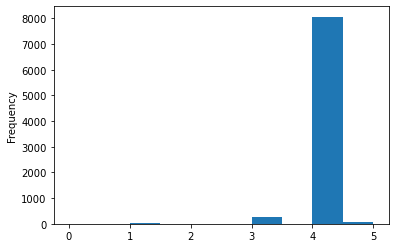

In [39]:
columns = ['length', 'popularity',
              'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 
           'tempo', 'time_signature']


for col in columns:
    
    print('COLUMN:', col)
    print('n nulls:', df[col].isna().sum())
    
    # Visualize a histogram for each column
    df[col].plot(kind='hist')
    plt.show()
    
    print('\n')

It seems that Instrumentalness and Time Signature have the most skewed distribution. Given the previous finding that Winners and Losers had about the same averages and distributions for these columns, I may consider dropping these features for the analysis

<b>Exploring Correlations</b>

In [40]:
# Saving the correlation matrix to a variable called 'corr_mat'
corr_mat = df.corr()

# Displaying corr_mat
corr_mat

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
length,1.000000,-0.001808,-0.211342,-0.025138,0.010458,0.039286,0.032113,-0.101555,-0.159465,-0.008538,-0.000102,0.055581
popularity,-0.001808,1.000000,0.017868,0.070637,-0.095107,-0.045677,-0.050709,-0.035845,0.004446,-0.024008,-0.003942,0.077824
danceability,-0.211342,0.017868,1.000000,-0.220476,0.107678,-0.018935,-0.089527,0.153282,0.220411,-0.108224,0.146717,-0.054634
acousticness,-0.025138,0.070637,-0.220476,1.000000,-0.606484,-0.011477,-0.087470,-0.453093,-0.061257,-0.139564,-0.119051,0.090993
energy,0.010458,-0.095107,0.107678,-0.606484,1.000000,0.029244,0.165725,0.701210,0.019700,0.156186,0.124093,-0.081350
instrumentalness,0.039286,-0.045677,-0.018935,-0.011477,0.029244,1.000000,-0.004373,-0.095536,-0.061673,0.026693,-0.020611,0.016028
liveness,0.032113,-0.050709,-0.089527,-0.087470,0.165725,-0.004373,1.000000,0.103016,0.070952,0.026131,0.012146,-0.015096
loudness,-0.101555,-0.035845,0.153282,-0.453093,0.701210,-0.095536,0.103016,1.000000,0.057835,0.087159,0.086249,-0.092775
speechiness,-0.159465,0.004446,0.220411,-0.061257,0.019700,-0.061673,0.070952,0.057835,1.000000,0.088783,0.041506,-0.043186
tempo,-0.008538,-0.024008,-0.108224,-0.139564,0.156186,0.026693,0.026131,0.087159,0.088783,1.000000,0.027082,-0.022411


Some High Correlations (above 0.5 or below -0.5): <br>
Acousticness & Energy: -0.606 <br>
Energy & Loudness: 0.70 <br>

In [48]:
# Checking these correlation p-values to determine if the correlation may be due to chance or not

In [41]:
import scipy.stats

In [42]:
acou = df['acousticness']
energy = df['energy']
loud = df['loudness']

In [43]:
r, p = scipy.stats.pearsonr(acou, energy)
print(f'correlation = {r}')
print(f'p-value = {p}')

correlation = -0.6064841461909674
p-value = 0.0


In [44]:
r, p = scipy.stats.pearsonr(loud, energy)
print(f'correlation = {r}')
print(f'p-value = {p}')

correlation = 0.701209969644407
p-value = 0.0


Given the fact that for both of the high correlations, there are p-values less than 0.05, we can conclude that the correlations are statistically significant. We will then need to drop a column. Since Energy is present for both correlations, that will be the column we drop

In [45]:
df = df.drop('energy', axis = 1)

In [46]:
# Re-running the correlation matrix to double check and make sure there are no more highly correlated columns

# Saving the correlation matrix to a variable called 'corr_mat'
corr_mat = df.corr()

# Displaying corr_mat
corr_mat

,length,popularity,danceability,acousticness,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
length,1.000000,-0.001808,-0.211342,-0.025138,0.039286,0.032113,-0.101555,-0.159465,-0.008538,-0.000102,0.055581
popularity,-0.001808,1.000000,0.017868,0.070637,-0.045677,-0.050709,-0.035845,0.004446,-0.024008,-0.003942,0.077824
danceability,-0.211342,0.017868,1.000000,-0.220476,-0.018935,-0.089527,0.153282,0.220411,-0.108224,0.146717,-0.054634
acousticness,-0.025138,0.070637,-0.220476,1.000000,-0.011477,-0.087470,-0.453093,-0.061257,-0.139564,-0.119051,0.090993
instrumentalness,0.039286,-0.045677,-0.018935,-0.011477,1.000000,-0.004373,-0.095536,-0.061673,0.026693,-0.020611,0.016028
liveness,0.032113,-0.050709,-0.089527,-0.087470,-0.004373,1.000000,0.103016,0.070952,0.026131,0.012146,-0.015096
loudness,-0.101555,-0.035845,0.153282,-0.453093,-0.095536,0.103016,1.000000,0.057835,0.087159,0.086249,-0.092775
speechiness,-0.159465,0.004446,0.220411,-0.061257,-0.061673,0.070952,0.057835,1.000000,0.088783,0.041506,-0.043186
tempo,-0.008538,-0.024008,-0.108224,-0.139564,0.026693,0.026131,0.087159,0.088783,1.000000,0.027082,-0.022411
time_signature,-0.000102,-0.003942,0.146717,-0.119051,-0.020611,0.012146,0.086249,0.041506,0.027082,1.000000,-0.021743


## Logistic Regression Modeling

In [47]:
X = df.iloc[:, 4:-1]
y = df.iloc[:,-1]

In [48]:
y.value_counts()

0    8377
1      62
Name: record_of_the_year, dtype: int64

There is a significant class imbalance when it comes to the record_of_the_year column. I will likely need to upample the winners, however first I will run a model to get an initial sense of model accuracy, precision and recall

In [49]:
# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# 1. Instantiate model
logit_model1 = LogisticRegression(random_state=1, max_iter=10000)

# 2. Fit model
logit_model1.fit(X_train, y_train);

In [52]:
# 3. Score model
print(f'Score on train: {logit_model1.score(X_train, y_train)}')
print(f'Score on test: {logit_model1.score(X_test, y_test)}')

Score on train: 0.9927205011003893
Score on test: 0.9924960505529226


While the model predicts correctly with 99% accuracy, this is probably misleading, so I am going to check the confusion matrix and examine the precision and recall

In [53]:
# Check Confusion Matrix
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = logit_model1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2513,    0],
       [  19,    0]])

The model simply predicted all tracks as non-winners which is not an accurate way to predict

In [55]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [56]:
# precision_score(true labels, predicted labels)
print(f'Precision Score {precision_score(y_test, y_pred)}')
print(f'Recall Score {recall_score(y_test, y_pred)}')

Precision Score 0.0
Recall Score 0.0


/Users/alexcohen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Checking the classification report

from sklearn.metrics import classification_report

In [58]:
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2513
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2532
   macro avg       0.50      0.50      0.50      2532
weighted avg       0.99      0.99      0.99      2532



/Users/alexcohen/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Given the terrible precision and recall scores for predicting Winners (1), we will definitely need to employ upsampling in our dataset

## Upsampling <br>
To attempt to improve the model, i am going to upsample the minority class (Record of the Year Winners). Initially, I will upsample it so that the training data consists of equal proportions of winners and losers.

In [59]:
from sklearn.utils import resample

In [60]:
# Showing the number of winners in the training set before upsampling
print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=1)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 43
Number of class 1 examples after: 5864


In [61]:
# initialize, fit, and evaluate our second log reg model
logit_model2 = LogisticRegression(random_state=1)
logit_model2.fit(X_train_bal, y_train_bal);
y_pred_bal = logit_model2.predict(X_test)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[1566  947]
 [   2   17]]

Original data classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2513
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2532
   macro avg       0.50      0.50      0.50      2532
weighted avg       0.99      0.99      0.99      2532


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77      2513
           1       0.02      0.89      0.03        19

    accuracy                           0.63      2532
   macro avg       0.51      0.76      0.40      2532
weighted avg       0.99      0.63      0.76      2532



While precision only slightly increased by 0.02, and overall accuracy decreased from 99% to 63%, recall increased by a whopping 0.89%. Given these changes, we are now learning more about our minority class and limiting the amount of false negatives.

## Grid Search For Best Model To Use

In order to figure out if a Logistic Model is in fact the best model to use, or if it makes more sense to employ a different model such as PCA, SVM, Decision Tree or K-Nearest Neighbors, I am going to do a grid search over multiple models and hyperparameters. For these models, I will still use the upsampled data in order to ensure better recall scores across the models

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Setting up a pipeline object with processing steps and final model step
estimators = [('scale', StandardScaler()),
             ('reduce_dim', PCA()),
             ('model', LogisticRegression())]
pipe = Pipeline(estimators)

In [23]:
# Setting up the parameter grid for hyperparameters to search across

param_grid = [
    {'model': [LogisticRegression(solver='liblinear')],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'reduce_dim': [PCA()],
    'reduce_dim__n_components': [0.3,0.5,0.8],
    'model__C': list(np.logspace(-5,5,11)),
    'model__penalty': ['l1','l2']},
    {'model': [DecisionTreeClassifier()],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'reduce_dim': [PCA()],
    'reduce_dim__n_components': [0.3,0.5,0.8],
    'model__max_depth': list(range(1,int(np.sqrt(len(X_train_bal))),5)),
    'model__min_samples_leaf': [1,2,4,5,6,7]},
    {'model': [KNeighborsClassifier()],
    'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(), None],
    'reduce_dim': [PCA()],
    'reduce_dim__n_components': [0.3,0.5,0.8],
    'model__n_neighbors': list(range(1, 405))}
]

In [24]:
# Create gridsearch object and fit it
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

fitted_grid = grid.fit(X_train_bal,y_train_bal)

Fitting 5 folds for each of 6696 candidates, totalling 33480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 9369 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 9968 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 10618 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 11368 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12218 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 13168 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 14218 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 15368 tasks      | elapsed: 608.6min
[Parallel(n_jobs=-1)]: Done 17732 tasks      | elapsed: 610.2min
[Parallel(n_jobs=-1)]: Done 20432 tasks      | elapsed: 612.3min
[Parallel(n_jobs=-1)]: Done 22034

In [26]:
# Get the best estimator model
fitted_grid.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dim', PCA(n_components=0.3)),
                ('model', DecisionTreeClassifier(max_depth=26))])

In [27]:
print(fitted_grid.score(X_train_bal,y_train_bal))
print(fitted_grid.score(X_test,y_test))

1.0
0.9861769352290679


## Running Decision Tree Classifier Model with PCA

In [36]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train_bal)
X_train_bal = scaler.transform(X_train_bal)
X_test = scaler.transform(X_test)

# Initiating and fitting the PCA
my_pca = PCA(n_components=0.3)
my_pca.fit(X_train_bal)

# transform data onto the first two principal components
X_train_PCA = my_pca.transform(X_train_bal)

# Transform test data, with PCA fit on trainign data!!!
X_test_PCA = my_pca.transform(X_test)

In [37]:
# Instantiate and train the classifier
DT_model1 = DecisionTreeClassifier(max_depth=26, random_state=1)
DT_model1.fit(X_train_PCA, y_train_bal)
# Evaluate it

print(f'The train accuracy is: {DT_model1.score(X_train_PCA,y_train_bal):0.3f}')
print(f'The test accuracy is: {DT_model1.score(X_test_PCA,y_test):0.3f}')

The train accuracy is: 1.000
The test accuracy is: 0.986


In [38]:
# Checking the confusion matrix with new model to score precision and recall

# initialize, fit, and evaluate our second log reg model
DT_model1 = DecisionTreeClassifier(max_depth=26, random_state=1)
DT_model1.fit(X_train_PCA, y_train_bal);
y_pred_bal = DT_model1.predict(X_test_PCA)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[2495   18]
 [  18    1]]

Upsampled data classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2513
           1       0.05      0.05      0.05        19

    accuracy                           0.99      2532
   macro avg       0.52      0.52      0.52      2532
weighted avg       0.99      0.99      0.99      2532



While the accuracy score is good at 99%, the precision and recall scores are terrible (5%). Going to look back into Logistic Regression Modeling and fine tune the hyperparameters to see if I can improve recall and accuracy.

## Fine Tuning Logistic Regression

In [42]:
# Re-Running the confusion matrix for the upsampled Logistic Regression Model now with scaled data

# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

# Upsampling the data
X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=1)

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

# Scale data
scaler = StandardScaler()
scaler.fit(X_train_bal)
X_train_bal = scaler.transform(X_train_bal)
X_test = scaler.transform(X_test)

# initialize, fit, and evaluate our second log reg model
logit_model3 = LogisticRegression(random_state=1)
logit_model3.fit(X_train_bal, y_train_bal);
y_pred_bal = logit_model3.predict(X_test)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[2021  492]
 [   5   14]]

Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      2513
           1       0.03      0.74      0.05        19

    accuracy                           0.80      2532
   macro avg       0.51      0.77      0.47      2532
weighted avg       0.99      0.80      0.88      2532



After scaling the data, recall decreased but accuracy increased

In [ ]:
# Exploring PCA fits to use with this Logistic Regression Model

In [40]:
# Initiating and fitting the PCA with 90% of the variance explained
my_pca = PCA(n_components=0.9)
my_pca.fit(X_train_bal)

# transform data onto the first two principal components
X_train_PCA = my_pca.transform(X_train_bal)

# Transform test data, with PCA fit on trainign data!!!
X_test_PCA = my_pca.transform(X_test)

In [44]:
# Re-Running the confusion matrix and classification report with the PCA data
# initialize, fit, and evaluate our second log reg model
logit_model4 = LogisticRegression(random_state=1)
logit_model4.fit(X_train_PCA, y_train_bal);
y_pred_bal = logit_model4.predict(X_test_PCA)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[2029  484]
 [   5   14]]

Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89      2513
           1       0.03      0.74      0.05        19

    accuracy                           0.81      2532
   macro avg       0.51      0.77      0.47      2532
weighted avg       0.99      0.81      0.89      2532



Accuracy impoved by 1% with the PCA data. Now I am going to explore different C values to see if that may improve the model

In [47]:
test_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    logit_model5 = LogisticRegression(C = c,random_state=1)
    logit_model5.fit(X_train_PCA, y_train_bal)
    
    # train on traning set
    train_scores.append(logit_model5.score(X_train_PCA, y_train_bal))
    # score on test set
    test_scores.append(logit_model5.score(X_test_PCA,y_test))

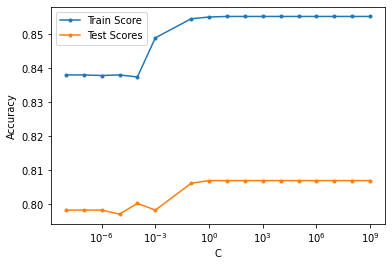

In [48]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, test_scores,label="Test Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

The default C value seems to be the correct one to use for this model

<b> Using KBest to figure out if there are other columns we can drop to improve our model </b>

In [63]:
# Re-importing data as df2 to work with all columns

df2 = pd.read_csv("Record_of_the_Year.csv", index_col=0)
df2 = df2.drop('danceability.1', axis = 1)
df2.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.982,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.760,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.631,0.3890,0.843000,0.295,-12.825,0.0253,92.631,4,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.966,0.2640,0.074700,0.128,-12.817,0.0312,91.656,3,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.955,0.0780,0.000004,0.169,-17.583,0.0332,128.065,4,1


In [64]:
df2.reset_index(drop=True)

,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.9820,0.0588,0.000016,0.1930,-17.062,0.0405,129.510,4,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.7600,0.5290,0.000000,0.2060,-12.291,0.1080,82.755,4,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.6310,0.3890,0.843000,0.2950,-12.825,0.0253,92.631,4,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.9660,0.2640,0.074700,0.1280,-12.817,0.0312,91.656,3,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.9550,0.0780,0.000004,0.1690,-17.583,0.0332,128.065,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8434,Goodbye Girl,Goodbye Girl,David Gates,1978,168866,60,0.467,0.6050,0.2550,0.000310,0.2730,-15.963,0.0372,120.174,4,0
8435,My Cherie Amour,My Cherie Amour,Stevie Wonder,1969-08-01,173306,0,0.570,0.2820,0.5230,0.000003,0.2480,-11.052,0.0277,101.137,4,0
8436,How Deep Is Your Love (2007 Remastered Saturda...,Saturday Night Fever [The Original Movie Sound...,Bee Gees,1978-01-05,245200,0,0.630,0.0999,0.3570,0.000000,0.1280,-9.392,0.0260,104.965,4,0
8437,Get Together,Get Together: The Essential Youngbloods,The Youngbloods,2002-05-06,276466,44,0.533,0.3510,0.5800,0.002780,0.0865,-9.265,0.0256,103.127,4,0


In [65]:
X = df2.iloc[:, 4:-1]
y = df2.iloc[:,-1]

In [66]:
X.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,219120,56,0.547,0.982,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4
1,184333,62,0.549,0.760,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4
2,144893,49,0.466,0.631,0.3890,0.843000,0.295,-12.825,0.0253,92.631,4
3,160693,39,0.235,0.966,0.2640,0.074700,0.128,-12.817,0.0312,91.656,3
4,170960,62,0.313,0.955,0.0780,0.000004,0.169,-17.583,0.0332,128.065,4


In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

In [68]:
# feature extraction: scoring all columns in the X variable to rank all features
selector = SelectKBest(score_func=f_classif, k=11)
fit = selector.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:10,:])

[26.144 51.411 25.259 70.44  56.207  2.168  1.923 73.249 15.765  4.24
  3.991]
[[ 2.191e+05  5.600e+01  5.470e-01  9.820e-01  5.880e-02  1.590e-05
   1.930e-01 -1.706e+01  4.050e-02  1.295e+02  4.000e+00]
 [ 1.843e+05  6.200e+01  5.490e-01  7.600e-01  5.290e-01  0.000e+00
   2.060e-01 -1.229e+01  1.080e-01  8.275e+01  4.000e+00]
 [ 1.449e+05  4.900e+01  4.660e-01  6.310e-01  3.890e-01  8.430e-01
   2.950e-01 -1.282e+01  2.530e-02  9.263e+01  4.000e+00]
 [ 1.607e+05  3.900e+01  2.350e-01  9.660e-01  2.640e-01  7.470e-02
   1.280e-01 -1.282e+01  3.120e-02  9.166e+01  3.000e+00]
 [ 1.710e+05  6.200e+01  3.130e-01  9.550e-01  7.800e-02  4.480e-06
   1.690e-01 -1.758e+01  3.320e-02  1.281e+02  4.000e+00]
 [ 1.271e+05  1.800e+01  1.760e-01  9.460e-01  2.040e-01  0.000e+00
   1.650e-01 -1.164e+01  2.940e-02  8.236e+01  4.000e+00]
 [ 3.218e+05  6.900e+01  6.640e-01  9.090e-01  1.940e-01  3.850e-05
   8.290e-02 -1.549e+01  3.570e-02  1.299e+02  4.000e+00]
 [ 1.637e+05  4.500e+01  5.520e-01  7.7

<b>Listing out the columns in order of their KBest ranking: </b> <br>

<b>Loudness</b>: 73.249 <br>

<b>Acousticness</b>: 70.44 <br>

<b>Energy</b>: 56.207 <br>

<b>Popularity</b>: 51.411 <br>

<b>Length</b>: 26.144  <br>

<b>Danceability</b>: 25.259 <br>

<b>Speechiness</b>: 15.765 <br>

<b>Tempo</b>: 4.24 <br>

<b>Time Signature</b>: 3.991 <br>

<b>Instrumentalness</b>: 2.168 <br>

<b>Liveness</b>: 1.923 <br>


I am going to drop the three lowest rated features: `Time Signature` `Instrumentalness` and `Liveness`. Additionally, based on previous findings regarding correlation, I am also going to drop `Energy`. This will leave us with 7 features to build our new Logistic Regression model on.

## Dropping multiple columns and re-running Logistic Regression (without PCA)

In [69]:
df2 = df2.drop('time_signature', axis = 1)
df2 = df2.drop('instrumentalness', axis = 1)
df2 = df2.drop('liveness', axis = 1)
df2 = df2.drop('energy', axis = 1)
df2.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,loudness,speechiness,tempo,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.982,-17.062,0.0405,129.510,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.760,-12.291,0.1080,82.755,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.631,-12.825,0.0253,92.631,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.966,-12.817,0.0312,91.656,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.955,-17.583,0.0332,128.065,1


In [70]:
df2

,name,album,artist,release_date,length,popularity,danceability,acousticness,loudness,speechiness,tempo,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.9820,-17.062,0.0405,129.510,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.7600,-12.291,0.1080,82.755,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.6310,-12.825,0.0253,92.631,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.9660,-12.817,0.0312,91.656,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.9550,-17.583,0.0332,128.065,1
...,...,...,...,...,...,...,...,...,...,...,...,...
594,Goodbye Girl,Goodbye Girl,David Gates,1978,168866,60,0.467,0.6050,-15.963,0.0372,120.174,0
595,My Cherie Amour,My Cherie Amour,Stevie Wonder,1969-08-01,173306,0,0.570,0.2820,-11.052,0.0277,101.137,0
596,How Deep Is Your Love (2007 Remastered Saturda...,Saturday Night Fever [The Original Movie Sound...,Bee Gees,1978-01-05,245200,0,0.630,0.0999,-9.392,0.0260,104.965,0
597,Get Together,Get Together: The Essential Youngbloods,The Youngbloods,2002-05-06,276466,44,0.533,0.3510,-9.265,0.0256,103.127,0


In [71]:
# Assigning X and Y variables based on the new dataframe

X = df2.iloc[:, 4:-1]
y = df2.iloc[:,-1]

In [72]:
X.head()

,length,popularity,danceability,acousticness,loudness,speechiness,tempo
0,219120,56,0.547,0.982,-17.062,0.0405,129.510
1,184333,62,0.549,0.760,-12.291,0.1080,82.755
2,144893,49,0.466,0.631,-12.825,0.0253,92.631
3,160693,39,0.235,0.966,-12.817,0.0312,91.656
4,170960,62,0.313,0.955,-17.583,0.0332,128.065


In [73]:
# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [74]:
# Upsampling our data

print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=1)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 43
Number of class 1 examples after: 5864


In [75]:
# initialize, fit, and evaluate our sixth log reg model
logit_model6 = LogisticRegression(random_state=1)
logit_model6.fit(X_train_bal, y_train_bal);
y_pred_bal = logit_model6.predict(X_test)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[1563  950]
 [   2   17]]

Original data classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2513
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2532
   macro avg       0.50      0.50      0.50      2532
weighted avg       0.99      0.99      0.99      2532


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.62      0.77      2513
           1       0.02      0.89      0.03        19

    accuracy                           0.62      2532
   macro avg       0.51      0.76      0.40      2532
weighted avg       0.99      0.62      0.76      2532



Recall has now gotten even better, jumping up to 89%, however our accuracy score has suffered, decreasing to only 62%.
To see if we can improve accuracy, I am going to first examine multiple C values for the logistic regression model

In [76]:
test_scores = []
train_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

for c in C_range:
    logit_model6 = LogisticRegression(C = c,random_state=1)
    logit_model6.fit(X_train_bal, y_train_bal)
    
    # train on traning set
    train_scores.append(logit_model6.score(X_train_bal, y_train_bal))
    # score on test set
    test_scores.append(logit_model6.score(X_test,y_test))

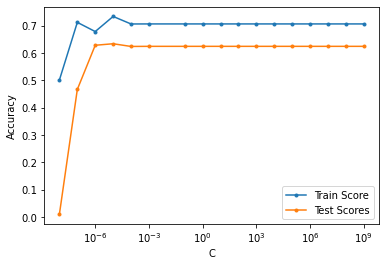

In [77]:
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, test_scores,label="Test Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

It seems like accuracy is not drastically improved by changing the C-value. Going to now scale the data to see if that may help

In [78]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train_bal)
X_train_bal = scaler.transform(X_train_bal)
X_test = scaler.transform(X_test)

# initialize, fit, and evaluate our seventh log reg model
logit_model7 = LogisticRegression(random_state=1)
logit_model7.fit(X_train_bal, y_train_bal);
y_pred_bal = logit_model7.predict(X_test)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[2026  487]
 [   6   13]]

Original data classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2513
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2532
   macro avg       0.50      0.50      0.50      2532
weighted avg       0.99      0.99      0.99      2532


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89      2513
           1       0.03      0.68      0.05        19

    accuracy                           0.81      2532
   macro avg       0.51      0.75      0.47      2532
weighted avg       0.99      0.81      0.89      2532



Recall dropped to 68% while accuracy improved to 81%

Going to try implementing PCA on this smaller scalled dataset to see if that may help

In [79]:
my_pca = PCA(n_components=0.9)
my_pca.fit(X_train_bal)

# transform data onto the first two principal components
X_train_PCA = my_pca.transform(X_train_bal)

# Transform test data, with PCA fit on trainign data!!!
X_test_PCA = my_pca.transform(X_test)

In [80]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train_bal)
X_train_bal = scaler.transform(X_train_bal)
X_test = scaler.transform(X_test)

# Fit a PCA to explain 90% of variance
my_pca = PCA(n_components=0.9)
my_pca.fit(X_train_bal)

# transform data onto the first two principal components
X_train_PCA = my_pca.transform(X_train_bal)

# Transform test data, with PCA fit on trainign data!!!
X_test_PCA = my_pca.transform(X_test)

# Instantiating and fiting the 8th logistic regression model
logit_model8 = LogisticRegression(random_state=1)
logit_model8.fit(X_train_PCA, y_train_bal);
y_pred_bal = logit_model8.predict(X_test_PCA)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[2021  492]
 [   5   14]]

Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      2513
           1       0.03      0.74      0.05        19

    accuracy                           0.80      2532
   macro avg       0.51      0.77      0.47      2532
weighted avg       0.99      0.80      0.88      2532



THIS HAS BEEN THE BEST MODEL I'VE RUN SO FAR!!! The recall score is at 74% while the accruacy score is at 80%

In [89]:
model = logit_model8.fit(X_train_PCA, y_train_bal)
model.coef_

array([[ 1.808,  1.024, -0.078,  1.308, -0.294, -0.096]])

In [91]:
X_train.head()

,length,popularity,danceability,acousticness,loudness,speechiness,tempo
2052,229605,0,0.687,0.01730,-7.283,0.0500,135.012
2167,182733,31,0.363,0.00574,-4.863,0.0607,161.151
670,207457,60,0.445,0.01640,-4.802,0.1810,200.040
1231,218346,33,0.750,0.20900,-5.776,0.0399,140.001
261,263177,46,0.645,0.00796,-7.157,0.0301,126.008


##  BONUS ADDITIONAL EXPLORATION: Reducing the Data to only songs released 1990 and after

In [99]:
df3 = pd.read_csv("Record_of_the_Year.csv", index_col=0)

In [100]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 0 to 598
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8437 non-null   object 
 1   album               8437 non-null   object 
 2   artist              8437 non-null   object 
 3   release_date        8439 non-null   object 
 4   length              8439 non-null   int64  
 5   popularity          8439 non-null   int64  
 6   danceability        8439 non-null   float64
 7   acousticness        8439 non-null   float64
 8   danceability.1      8439 non-null   float64
 9   energy              8439 non-null   float64
 10  instrumentalness    8439 non-null   float64
 11  liveness            8439 non-null   float64
 12  loudness            8439 non-null   float64
 13  speechiness         8439 non-null   float64
 14  tempo               8439 non-null   float64
 15  time_signature      8439 non-null   int64  
 16  record_

In [101]:
df3.head(20)

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.98200,0.547,0.0588,0.000016,0.1930,-17.062,0.0405,129.510,4,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.76000,0.549,0.5290,0.000000,0.2060,-12.291,0.1080,82.755,4,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.63100,0.466,0.3890,0.843000,0.2950,-12.825,0.0253,92.631,4,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.96600,0.235,0.2640,0.074700,0.1280,-12.817,0.0312,91.656,3,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.95500,0.313,0.0780,0.000004,0.1690,-17.583,0.0332,128.065,4,1
5,Days of Wine and Roses,The Essential Henry Mancini,Henry Mancini,1958,127093,18,0.176,0.94600,0.176,0.2040,0.000000,0.1650,-11.643,0.0294,82.360,4,1
6,The Girl From Ipanema,The Girl From Ipanema - The Bossa Nova Years,Stan Getz,1989-01-01,321826,69,0.664,0.90900,0.664,0.1940,0.000039,0.0829,-15.487,0.0357,129.863,4,1
7,A Taste Of Honey,Whipped Cream & Other Delights,Herb Alpert & The Tijuana Brass,1965-04-01,163746,45,0.552,0.77100,0.552,0.4230,0.881000,0.1110,-11.109,0.0365,80.871,4,1
8,Strangers In The Night,Strangers In The Night (Expanded Edition),Frank Sinatra,1966-05,157866,68,0.259,0.59200,0.259,0.4730,0.000000,0.2010,-8.275,0.0295,90.348,4,1
9,"Up, Up and Away","Up, Up And Away",The 5th Dimension,1967,163346,47,0.393,0.59900,0.393,0.3620,0.000000,0.3330,-14.601,0.0305,107.645,5,1


In [102]:
df3['release_date'] = df3['release_date'].apply(pd.to_datetime)

In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8439 entries, 0 to 598
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                8437 non-null   object        
 1   album               8437 non-null   object        
 2   artist              8437 non-null   object        
 3   release_date        8439 non-null   datetime64[ns]
 4   length              8439 non-null   int64         
 5   popularity          8439 non-null   int64         
 6   danceability        8439 non-null   float64       
 7   acousticness        8439 non-null   float64       
 8   danceability.1      8439 non-null   float64       
 9   energy              8439 non-null   float64       
 10  instrumentalness    8439 non-null   float64       
 11  liveness            8439 non-null   float64       
 12  loudness            8439 non-null   float64       
 13  speechiness         8439 non-null   float64      

In [104]:
df3.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.982,0.547,0.0588,0.000016,0.193,-17.062,0.0405,129.510,4,1
1,Mack the Knife,That's All,Bobby Darin,1959-01-01,184333,62,0.549,0.760,0.549,0.5290,0.000000,0.206,-12.291,0.1080,82.755,4,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953-01-01,144893,49,0.466,0.631,0.466,0.3890,0.843000,0.295,-12.825,0.0253,92.631,4,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958-01-01,160693,39,0.235,0.966,0.235,0.2640,0.074700,0.128,-12.817,0.0312,91.656,3,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.955,0.313,0.0780,0.000004,0.169,-17.583,0.0332,128.065,4,1


In [107]:
df3.shape

(8439, 17)

In [126]:
df4 = df3[(df3['release_date'].dt.year >= 1990)]

In [127]:
df4.shape

(7520, 17)

In [128]:
df4.head(40)

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.98200,0.547,0.0588,0.000016,0.1930,-17.062,0.0405,129.510,4,1
10,Mrs. Robinson,Forrest Gump - The Soundtrack,Various Artists,2001-10-02,230733,38,0.608,0.79300,0.608,0.5130,0.000014,0.1070,-11.124,0.0467,91.946,4,1
16,I Honestly Love You,Back With A Heart,Olivia Newton-John,1998-01-01,246146,32,0.637,0.61300,0.637,0.3290,0.000002,0.1400,-11.362,0.0272,112.075,4,1
25,Beat It,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",Michael Jackson,1995-06-16,258266,64,0.762,0.02700,0.762,0.8000,0.000058,0.1700,-6.244,0.0449,138.823,4,1
26,What's Love Got to Do with It,What's Love Got to Do with It?,Tina Turner,1993-01-01,226880,74,0.851,0.21900,0.851,0.4060,0.000006,0.0853,-11.631,0.0661,97.840,4,1
34,Tears in Heaven,Clapton Chronicles: The Best of Eric Clapton,Eric Clapton,1999-10-12,271760,62,0.498,0.83500,0.498,0.2420,0.536000,0.1330,-12.238,0.0257,153.744,4,1
35,I Will Always Love You,The Bodyguard - Original Soundtrack Album,Whitney Houston,1992-11-17,271093,77,0.306,0.84400,0.306,0.2140,0.000005,0.0839,-12.518,0.0356,66.980,4,1
36,All I Wanna Do,Tuesday Night Music Club,Sheryl Crow,1993-08-03,272106,67,0.820,0.11100,0.820,0.5280,0.018600,0.2570,-11.179,0.0321,120.091,4,1
37,Kiss from a Rose,Seal,Seal,1994-05-31,288426,73,0.583,0.68400,0.583,0.5320,0.000000,0.3060,-7.110,0.0309,131.741,3,1
38,Change the World,Clapton Chronicles: The Best of Eric Clapton,Eric Clapton,1999-10-12,234866,67,0.721,0.49200,0.721,0.5580,0.005630,0.1130,-8.800,0.0246,96.887,4,1


In [129]:
df4=df4.reset_index() 

In [130]:
df4.head()

,index,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.982,0.547,0.0588,0.000016,0.1930,-17.062,0.0405,129.510,4,1
1,10,Mrs. Robinson,Forrest Gump - The Soundtrack,Various Artists,2001-10-02,230733,38,0.608,0.793,0.608,0.5130,0.000014,0.1070,-11.124,0.0467,91.946,4,1
2,16,I Honestly Love You,Back With A Heart,Olivia Newton-John,1998-01-01,246146,32,0.637,0.613,0.637,0.3290,0.000002,0.1400,-11.362,0.0272,112.075,4,1
3,25,Beat It,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",Michael Jackson,1995-06-16,258266,64,0.762,0.027,0.762,0.8000,0.000058,0.1700,-6.244,0.0449,138.823,4,1
4,26,What's Love Got to Do with It,What's Love Got to Do with It?,Tina Turner,1993-01-01,226880,74,0.851,0.219,0.851,0.4060,0.000006,0.0853,-11.631,0.0661,97.840,4,1


In [133]:
df4 = df4.drop(['index'], axis=1)

In [134]:
df4.head(20)

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.98200,0.547,0.0588,0.000016,0.1930,-17.062,0.0405,129.510,4,1
1,Mrs. Robinson,Forrest Gump - The Soundtrack,Various Artists,2001-10-02,230733,38,0.608,0.79300,0.608,0.5130,0.000014,0.1070,-11.124,0.0467,91.946,4,1
2,I Honestly Love You,Back With A Heart,Olivia Newton-John,1998-01-01,246146,32,0.637,0.61300,0.637,0.3290,0.000002,0.1400,-11.362,0.0272,112.075,4,1
3,Beat It,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",Michael Jackson,1995-06-16,258266,64,0.762,0.02700,0.762,0.8000,0.000058,0.1700,-6.244,0.0449,138.823,4,1
4,What's Love Got to Do with It,What's Love Got to Do with It?,Tina Turner,1993-01-01,226880,74,0.851,0.21900,0.851,0.4060,0.000006,0.0853,-11.631,0.0661,97.840,4,1
5,Tears in Heaven,Clapton Chronicles: The Best of Eric Clapton,Eric Clapton,1999-10-12,271760,62,0.498,0.83500,0.498,0.2420,0.536000,0.1330,-12.238,0.0257,153.744,4,1
6,I Will Always Love You,The Bodyguard - Original Soundtrack Album,Whitney Houston,1992-11-17,271093,77,0.306,0.84400,0.306,0.2140,0.000005,0.0839,-12.518,0.0356,66.980,4,1
7,All I Wanna Do,Tuesday Night Music Club,Sheryl Crow,1993-08-03,272106,67,0.820,0.11100,0.820,0.5280,0.018600,0.2570,-11.179,0.0321,120.091,4,1
8,Kiss from a Rose,Seal,Seal,1994-05-31,288426,73,0.583,0.68400,0.583,0.5320,0.000000,0.3060,-7.110,0.0309,131.741,3,1
9,Change the World,Clapton Chronicles: The Best of Eric Clapton,Eric Clapton,1999-10-12,234866,67,0.721,0.49200,0.721,0.5580,0.005630,0.1130,-8.800,0.0246,96.887,4,1


In [136]:
df4 = df4.drop([0,1,2,3,4], axis = 0)

In [137]:
df4.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,record_of_the_year
5,Tears in Heaven,Clapton Chronicles: The Best of Eric Clapton,Eric Clapton,1999-10-12,271760,62,0.498,0.835,0.498,0.242,0.536000,0.1330,-12.238,0.0257,153.744,4,1
6,I Will Always Love You,The Bodyguard - Original Soundtrack Album,Whitney Houston,1992-11-17,271093,77,0.306,0.844,0.306,0.214,0.000005,0.0839,-12.518,0.0356,66.980,4,1
7,All I Wanna Do,Tuesday Night Music Club,Sheryl Crow,1993-08-03,272106,67,0.820,0.111,0.820,0.528,0.018600,0.2570,-11.179,0.0321,120.091,4,1
8,Kiss from a Rose,Seal,Seal,1994-05-31,288426,73,0.583,0.684,0.583,0.532,0.000000,0.3060,-7.110,0.0309,131.741,3,1
9,Change the World,Clapton Chronicles: The Best of Eric Clapton,Eric Clapton,1999-10-12,234866,67,0.721,0.492,0.721,0.558,0.005630,0.1130,-8.800,0.0246,96.887,4,1


In [138]:
X = df4.iloc[:, 4:-1]
y = df4.iloc[:,-1]

In [139]:
# Create a train/test split with 70% train, 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [140]:
# Upsampling our data

print('Number of class 1 examples before:', X_train[y_train == 1].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 1], 
                                    y_train[y_train == 1], 
                                    replace=True, 
                                    n_samples=X_train[y_train == 0].shape[0], 
                                    random_state=1)

print('Number of class 1 examples after:', X_upsampled.shape[0])

# Combine upsample with original data
X_train_bal = np.vstack((X_train[y_train == 0], X_upsampled))
y_train_bal = np.hstack((y_train[y_train == 0], y_upsampled))

Number of class 1 examples before: 20
Number of class 1 examples after: 5240


In [141]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train_bal)
X_train_bal = scaler.transform(X_train_bal)
X_test = scaler.transform(X_test)

# initialize, fit, and evaluate our seventh log reg model
logit_model9 = LogisticRegression(random_state=1)
logit_model9.fit(X_train_bal, y_train_bal);
y_pred_bal = logit_model9.predict(X_test)

report_upsampled = classification_report(y_test, y_pred_bal)

# Print Results
print_line = "\n=======================================================\n"
print("Upsampled Confusion matrix:", print_line, confusion_matrix(y_test, y_pred_bal))
print("\nOriginal data classification report:", print_line, report_initial)
print("\nUpsampled data classification report:", print_line, report_upsampled)

Upsampled Confusion matrix: 
 [[1869  378]
 [   3    5]]

Original data classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2513
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2532
   macro avg       0.50      0.50      0.50      2532
weighted avg       0.99      0.99      0.99      2532


Upsampled data classification report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91      2247
           1       0.01      0.62      0.03         8

    accuracy                           0.83      2255
   macro avg       0.51      0.73      0.47      2255
weighted avg       0.99      0.83      0.90      2255



## BONUS: Looking at specific songs to see how the model predicts

In [183]:
df2.head(75)

,name,album,artist,release_date,length,popularity,danceability,acousticness,loudness,speechiness,tempo,record_of_the_year
0,Nel Blu Dipinto Di Blu,Nel Blu Dipinto Di Blu,Domenico Modugno,2008-04-28,219120,56,0.547,0.9820,-17.062,0.0405,129.510,1
1,Mack the Knife,That's All,Bobby Darin,1959,184333,62,0.549,0.7600,-12.291,0.1080,82.755,1
2,"The Theme from ""A Summer Place"" - Single Version",Percy Faith'S Greatest Hits,Percy Faith & His Orchestra,1953,144893,49,0.466,0.6310,-12.825,0.0253,92.631,1
3,Moon River,The Essential Henry Mancini,Henry Mancini,1958,160693,39,0.235,0.9660,-12.817,0.0312,91.656,1
4,(I Left My Heart) In San Francisco,I Left My Heart In San Francisco,Tony Bennett,1962-06-18,170960,62,0.313,0.9550,-17.583,0.0332,128.065,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8,Love the One You're With,Songs,Luther Vandross,1994-09-20,303360,29,0.653,0.1500,-8.260,0.0346,95.834,0
9,Hero,Music Box,Mariah Carey,1993-08-04,257733,72,0.501,0.7350,-9.370,0.0290,119.987,0
10,The Power of Love,The Colour Of My Love,Céline Dion,1993-11-09,342400,68,0.546,0.3600,-9.072,0.0291,140.054,0
11,Longing In Their Hearts,Longing In Their Hearts,Bonnie Raitt,1994-01-01,288506,18,0.666,0.0824,-11.252,0.0286,132.786,0


Bad Guy by Billie Eillish is at index 61, so lets see what it predicts for that.

In [ ]:
X = df2.iloc[:, 4:-1]

In [91]:
Bad_Guy = df2.iloc[61:62, 4:-1]

In [92]:
Bad_Guy

,length,popularity,danceability,acousticness,loudness,speechiness,tempo
61,194087,88,0.701,0.328,-10.965,0.375,135.128


In [97]:
BadGuy_PCA = my_pca.transform(Bad_Guy)

In [99]:
y_pred_BadGuy = logit_model8.predict(BadGuy_PCA)

In [100]:
y_pred_BadGuy

array([1])

It predicted correctly for Bad Guy!

Now lets check for Talk by Khalid. This song was nominated for Record of the Year but did not win

In [173]:
Talk = df2.iloc[556:557, 4:-1]

In [174]:
Talk_PCA = my_pca.transform(Talk)

In [175]:
y_pred_Talk = logit_model8.predict(Talk_PCA)
y_pred_Talk

array([1])

Unfortunately it also predicted that this song would win even though it did not. In order to better train this model, some more updates may need to be made down the road.